In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [7]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
  Using cached scikit_learn-1.4.2-cp39-cp39-win_amd64.whl (10.6 MB)
  Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [8]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
np.random.seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [9]:
# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [24]:
data=pd.read_csv('creditcard.csv')

In [25]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [15]:
fraud=np.array(data[data.Class==1].index)
no_records_fraud=len(fraud)
normal_indices=np.array(data[data.Class==0].index)
no_records_normal=len(normal_indices)

print("No. of Fraudulent Transaction is {} and No. of Normal Transaction is {}".format(no_records_fraud, no_records_normal))

No. of Fraudulent Transaction is 492 and No. of Normal Transaction is 284315


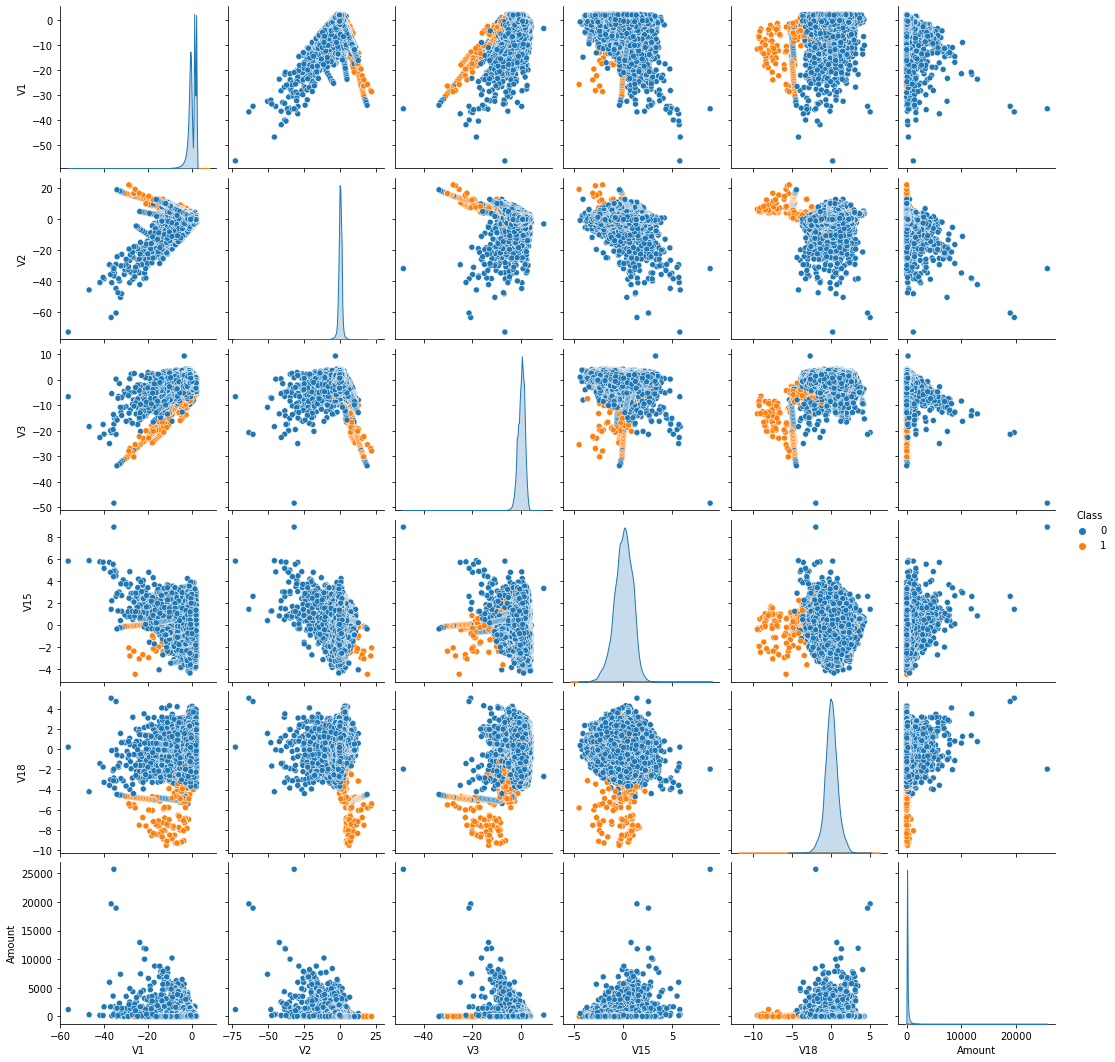

In [16]:
sns.pairplot(data, hue = 'Class', vars = ['V1', 'V2', 'V3', 'V15', 'V18','Amount'] )

<AxesSubplot:xlabel='Amount', ylabel='V1'>

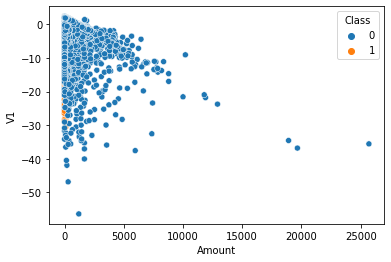

In [17]:
sns.scatterplot(x = 'Amount', y = 'V1',hue='Class',  data = data)

<AxesSubplot:title={'center':'Correlation with Class'}>

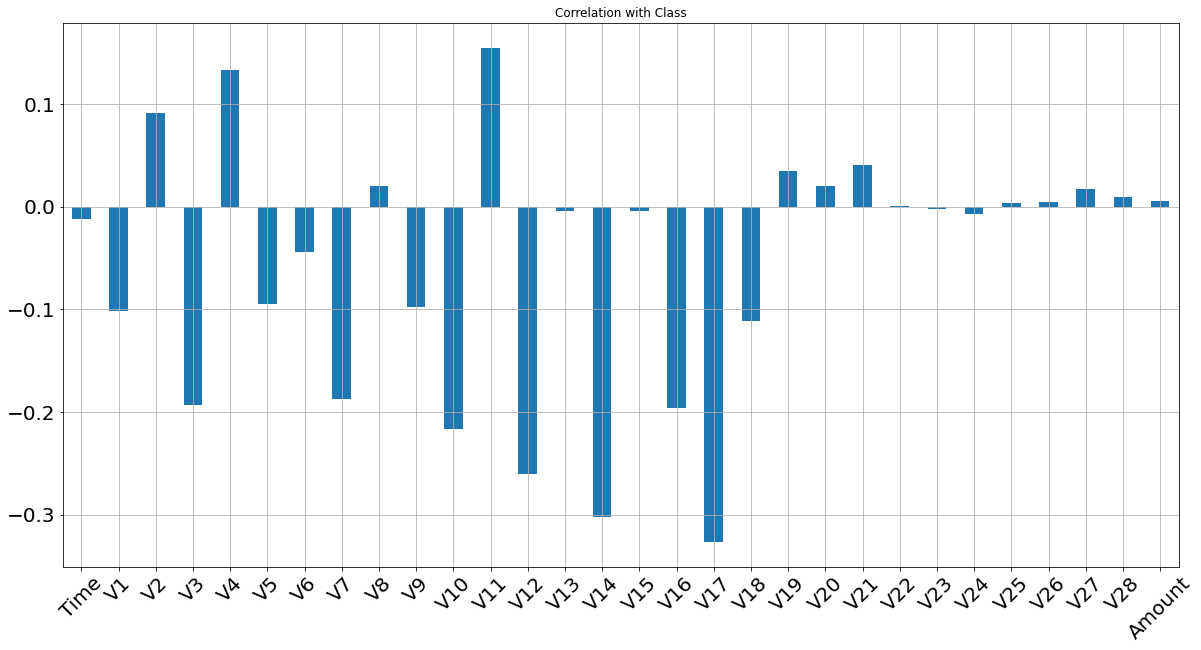

In [19]:
ds2 = data.drop(columns = ['Class'])
ds2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class", fontsize = 20,
        rot = 45, grid = True)

In [27]:
data['normalized_amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [28]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalized_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [29]:
data=data.drop(['Amount'],axis=1)

In [30]:
data=data.drop(['Time'],axis=1)

In [31]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [32]:
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [33]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [34]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [36]:
X_train.shape

(199364, 29)

In [37]:
X_test.shape

(85443, 29)

In [38]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [41]:
model = Sequential()

# define the layers of the model
model.add(Dense(units=16, input_shape=(29,), activation='relu'))  
model.add(Dense(units=24, activation='relu'))                    
model.add(Dropout(0.5))                                           
model.add(Dense(units=20, activation='relu'))                     
model.add(Dense(units=24, activation='relu'))                     
model.add(Dense(units=1, activation='sigmoid'))                   

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(X_train,y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9987 - loss: 0.0178
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9992 - loss: 0.0042
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9993 - loss: 0.0031
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9994 - loss: 0.0031


In [43]:
score=model.evaluate(X_test,y_test)
print(score)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9993 - loss: 0.0034
[0.0034553478471934795, 0.9994031190872192]


In [44]:
y_pred=model.predict(X_test)
y_test=pd.DataFrame(y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
Confusion matrix, without normalization
[[284248     67]
 [    97    395]]


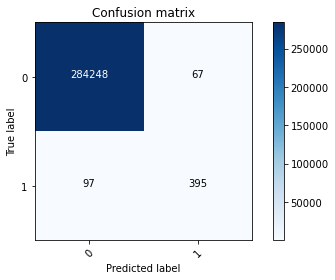

In [45]:
#conf matrix for entire dataset 
y_pred=model.predict(X)
y_test=pd.DataFrame(y)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [46]:
#random forest classifier
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [50]:
y_pred=rf.predict(X_test)

Confusion matrix, without normalization
[[85290     6]
 [   36   111]]


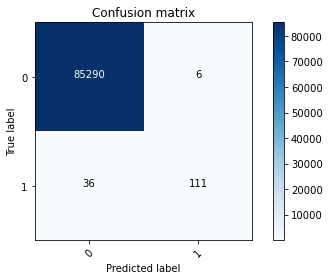

In [51]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [ ]:
### implementing undersamplimg to yield better results

In [ ]:
#fn reduced to 36 after applying random forest
y_pred=rf.predict(X)
cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [68]:
fraud=np.array(data[data.Class==1].index)
no_records_fraud=len(fraud)
print(no_records_fraud)

492


In [69]:
normal_indices=data[data.Class==0].index

In [70]:
random_normal_indices=np.random.choice(normal_indices,no_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [71]:
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [72]:
under_sample_data=data.iloc[under_sample_indices,:]

In [73]:
under_sample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [74]:
X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state=0)

In [76]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [77]:
#applying model again
model = Sequential([
     Dense(units=16, input_dim=29, activation='relu'),
     Dense(units=24,activation='relu'),
     Dropout(0.5),
     Dense(20,activation='relu'),
     Dense(24,activation='relu'),
     Dense(1,activation='sigmoid')  
    
    
])


C:\Users\prani\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 20)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 24)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,917 (7.49 KB)

 Trainable params: 1,917 (7.49 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5508 - loss: 0.6226
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8511 - loss: 0.4112
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9038 - loss: 0.3514
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - loss: 0.2758
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9280 - loss: 0.2661


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Confusion matrix, without normalization
[[149   0]
 [ 22 125]]


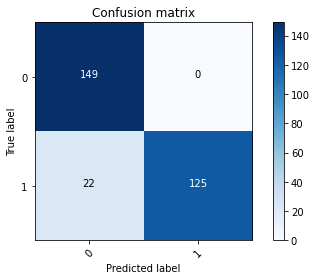

In [80]:
#confusion matrix for the dataset after undersampling 
y_pred=model.predict(X)
cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()